In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score

In [140]:
import sys
import os
from importlib import reload

# Add the path of your package
package_path = os.path.abspath("/Genomics/pritykinlab/tamjeed/github_packages/Gloss/")
sys.path.insert(0, package_path)
package_path = os.path.abspath("/Genomics/pritykinlab/tamjeed/github_packages/GlossPath/")
sys.path.insert(0, package_path)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pickle

In [334]:
method_colors = {
    'Ridge' : '#a8e6cf',
    'Lasso' : '#dcedc1',
    'ElasticNet' : '#ffd3b6',
    'Gloss Kegg' : '#ffaaa5',
    'Gloss Hmk.' : '#ff8b94',
}

In [335]:
method_renames = {
    'ridge' : 'Ridge',
    'lasso' : 'Lasso',
    'elasticnet' : 'ElasticNet',
    'kegg' : 'Gloss Kegg',
    'hallmark' : 'Gloss Hmk.'
}

## lcmv sys

In [336]:
with open('../model_ulipstic_lcmv/experiment_evaluations/model_arena_oct23_2024.pickle', 'rb') as handle:
    lcmv_res = pickle.load(handle)

In [337]:
ctype_res = lcmv_res['annot v2']['macrophage']

In [338]:
ctype_df = pd.DataFrame(ctype_res[0])

In [339]:
ctype_df = ctype_df.rename(columns=method_renames)

In [341]:
ctype_df = ctype_df.drop(columns=['Gloss Kegg', 'Gloss Hmk.'])

In [342]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [343]:
medians

Lasso         0.446139
Ridge         0.464454
ElasticNet    0.447891
dtype: float64

Text(0.5, 0, '$R^2$ Value')

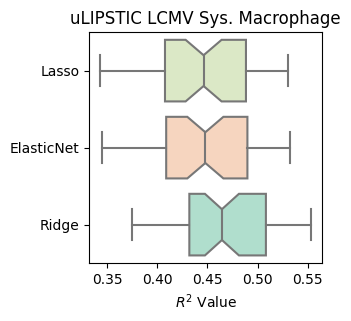

In [344]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('uLIPSTIC LCMV Sys. Macrophage')
plt.xlabel('$R^2$ Value')

In [345]:
with open('../model_ulipstic_lcmv/experiment_evaluations/model_arena_new_oct24_2024.pickle', 'rb') as handle:
    new_lcmv_res = pickle.load(handle)

In [346]:
new_ctype_res = new_lcmv_res['annot v2']['macrophage']

In [347]:
new_ctype_df = pd.DataFrame(new_ctype_res[0])

In [348]:
new_ctype_df = new_ctype_df.rename(columns=method_renames)

In [349]:
#new_ctype_df.columns = ['v2 ' + col for col in new_ctype_df.columns]

In [350]:
for col in new_ctype_df:
    ctype_df[col] = new_ctype_df[col]

In [351]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [352]:
medians

Lasso         0.446139
Ridge         0.464454
ElasticNet    0.447891
Gloss Hmk.    0.462196
Gloss Kegg    0.458389
dtype: float64

Text(0.5, 0, '$R^2$ Value')

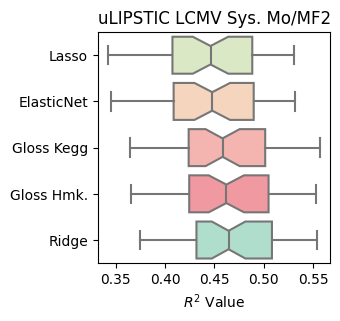

In [354]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('uLIPSTIC LCMV Sys. Mo/MF2')
plt.xlabel('$R^2$ Value')

## lcmv ln

In [355]:
with open('../model_ulipstic_lcmv/experiment_evaluations/model_arena_ln_oct23_2024.pickle', 'rb') as handle:
    lcmv_res = pickle.load(handle)

In [356]:
ctype_res = lcmv_res['annot']['Cd4']

In [357]:
ctype_df = pd.DataFrame(ctype_res[0])

In [358]:
ctype_df = ctype_df.rename(columns=method_renames)

In [359]:
ctype_df = ctype_df.drop(columns=['Gloss Kegg', 'Gloss Hmk.'])

In [360]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [361]:
medians

Lasso         0.320076
Ridge         0.316663
ElasticNet    0.320532
dtype: float64

In [362]:
with open('../model_ulipstic_lcmv/experiment_evaluations/model_arena_new_ln_oct24_2024.pickle', 'rb') as handle:
    new_lcmv_res = pickle.load(handle)

In [363]:
new_ctype_res = new_lcmv_res['annot']['Cd4']

In [364]:
new_ctype_df = pd.DataFrame(new_ctype_res[0])

In [365]:
new_ctype_df = new_ctype_df.rename(columns=method_renames)

In [366]:
#new_ctype_df.columns = ['v2 ' + col for col in new_ctype_df.columns]

In [367]:
for col in new_ctype_df:
    ctype_df[col] = new_ctype_df[col]

In [368]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [369]:
medians

Lasso         0.320076
Ridge         0.316663
ElasticNet    0.320532
Gloss Hmk.    0.332568
Gloss Kegg    0.319072
dtype: float64

Text(0.5, 0, '$R^2$ Value')

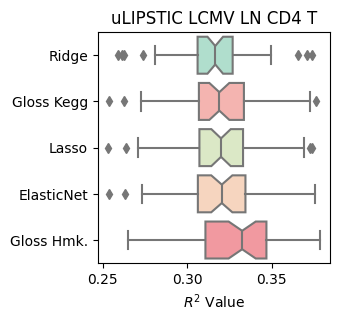

In [370]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('uLIPSTIC LCMV LN CD4 T')
plt.xlabel('$R^2$ Value')

## gut

In [371]:
with open('../model_ulipstic_gut/experiment_evaluations/model_arena_oct23_2024.pickle', 'rb') as handle:
    lcmv_res = pickle.load(handle)

In [372]:
ctype_res = lcmv_res['annotation']['CD4']

In [373]:
ctype_df = pd.DataFrame(ctype_res[0])

In [374]:
ctype_df = ctype_df.rename(columns=method_renames)

In [375]:
ctype_df = ctype_df.drop(columns=['Gloss Kegg', 'Gloss Hmk.'])

In [376]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [377]:
medians

Lasso         0.780861
Ridge         0.764119
ElasticNet    0.779460
dtype: float64

Text(0.5, 0, '$R^2$ Value')

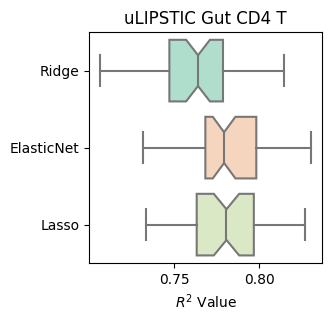

In [378]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('uLIPSTIC Gut CD4 T')
plt.xlabel('$R^2$ Value')

In [379]:
with open('../model_ulipstic_gut/experiment_evaluations/model_arena_new_oct24_2024.pickle', 'rb') as handle:
    new_lcmv_res = pickle.load(handle)

In [380]:
new_ctype_res = new_lcmv_res['annotation']['CD4']

In [381]:
new_ctype_df = pd.DataFrame(new_ctype_res[0])

In [382]:
new_ctype_df = new_ctype_df.rename(columns=method_renames)

In [383]:
#new_ctype_df.columns = ['v2 ' + col for col in new_ctype_df.columns]

In [384]:
for col in new_ctype_df:
    ctype_df[col] = new_ctype_df[col]

In [385]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [386]:
medians

Lasso         0.780861
Ridge         0.764119
ElasticNet    0.779460
Gloss Hmk.    0.782055
Gloss Kegg    0.783900
dtype: float64

Text(0.5, 0, '$R^2$ Value')

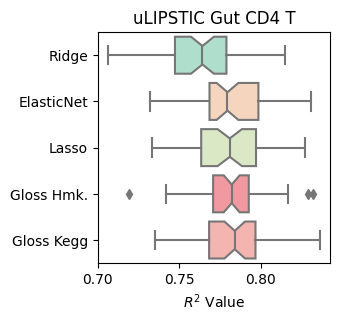

In [387]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('uLIPSTIC Gut CD4 T')
plt.xlabel('$R^2$ Value')

## lipstic tumor

In [405]:
with open('../model_lipstic_tumor/experiment_evaluations/model_arena_oct23_2024.pickle', 'rb') as handle:
    lcmv_res = pickle.load(handle)

In [423]:
ctype_res = lcmv_res['annotation_fine']['Mo/MF']

In [424]:
ctype_df = pd.DataFrame(ctype_res[0])

In [425]:
ctype_df = ctype_df.rename(columns=method_renames)

In [426]:
ctype_df = ctype_df.drop(columns=['Gloss Kegg', 'Gloss Hmk.'])

In [427]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [428]:
medians

Lasso         0.330883
Ridge         0.325249
ElasticNet    0.333964
dtype: float64

Text(0.5, 0, '$R^2$ Value')

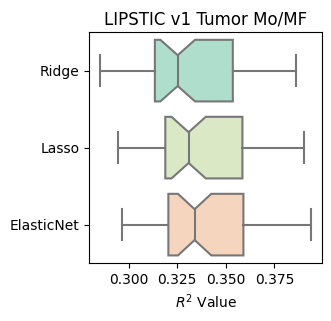

In [430]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('LIPSTIC v1 Tumor Mo/MF')
plt.xlabel('$R^2$ Value')

In [431]:
with open('../model_lipstic_tumor/experiment_evaluations/model_new_arena_oct24_2024.pickle', 'rb') as handle:
    new_lcmv_res = pickle.load(handle)

In [432]:
new_ctype_res = new_lcmv_res['annotation_fine']['Mo/MF']

In [433]:
new_ctype_df = pd.DataFrame(new_ctype_res[0])

In [434]:
new_ctype_df = new_ctype_df.rename(columns=method_renames)

In [435]:
#new_ctype_df.columns = ['v2 ' + col for col in new_ctype_df.columns]

In [436]:
for col in new_ctype_df:
    ctype_df[col] = new_ctype_df[col]

In [437]:
medians = ctype_df.median(axis=0)

# Sort the columns by median value
sorted_columns = medians.sort_values().index

# Reorder the DataFrame columns
mydf_sorted = ctype_df[sorted_columns]

In [438]:
medians

Lasso         0.330883
Ridge         0.325249
ElasticNet    0.333964
Gloss Hmk.    0.352292
Gloss Kegg    0.342874
dtype: float64

Text(0.5, 0, '$R^2$ Value')

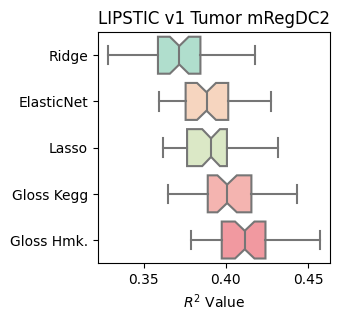

In [422]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('LIPSTIC v1 Tumor mRegDC2')
plt.xlabel('$R^2$ Value')

Text(0.5, 0, '$R^2$ Value')

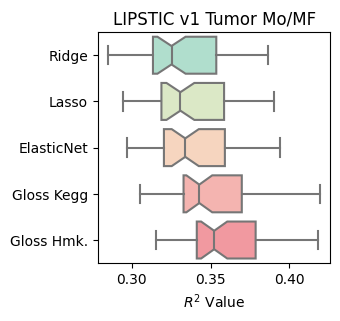

In [439]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('LIPSTIC v1 Tumor Mo/MF')
plt.xlabel('$R^2$ Value')

Text(0.5, 0, '$R^2$ Value')

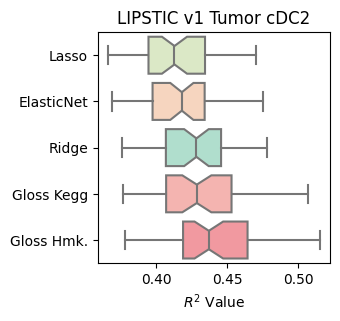

In [404]:
plt.figure(figsize = (3,3))
ax = sns.boxplot(mydf_sorted, orient='h', palette=method_colors, notch=True)
plt.title('LIPSTIC v1 Tumor cDC2')
plt.xlabel('$R^2$ Value')

## bootstrapping

In [530]:
with open('../model_lipstic_tumor/experiment_evaluations/tumor_new_gloss_bootstrap_kegg_oct24_2024.pickle', 'rb') as handle:
    kegg_dict = pickle.load(handle)

In [531]:
with open('../model_lipstic_tumor/experiment_evaluations/tumor_new_gloss_bootstrap_hallmark_oct24_2024.pickle', 'rb') as handle:
    hallmark_dict = pickle.load(handle)

In [532]:
sorted_dict = kegg_dict.pathway_frequencies['annotation_fine']['Mo/MF']

In [533]:
sub_sorted_dict = sorted_dict[:25]

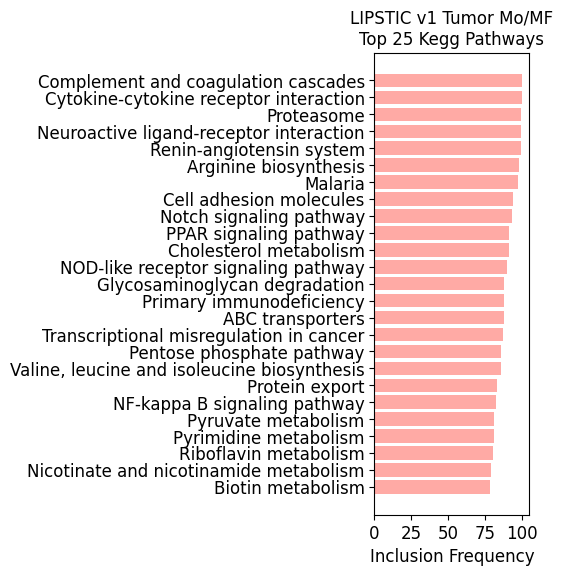

In [534]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('LIPSTIC v1 Tumor Mo/MF\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [448]:
newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

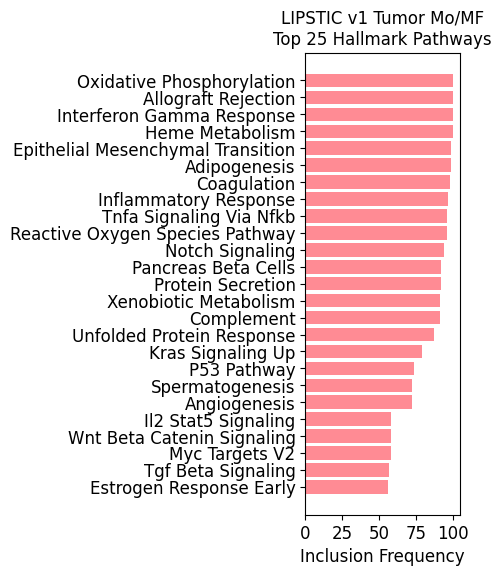

In [535]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['Mo/MF']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('LIPSTIC v1 Tumor Mo/MF\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [536]:
df = hallmark_dict.response_individual_genes['annotation_fine']['Mo/MF'].drop(columns='log')

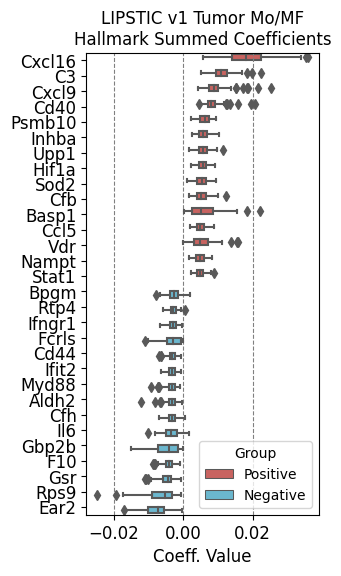

In [537]:
top_coeff_plot(df, 15, 'LIPSTIC v1 Tumor Mo/MF\nHallmark Summed Coefficients')

In [538]:
df = hallmark_dict.response['annotation_fine']['Mo/MF'].filter(like='HALLMARK_INTERFERON_GAMMA_RESPONSE')

In [539]:
df.columns = [myname.split('_', 1)[0] for myname in df.columns]

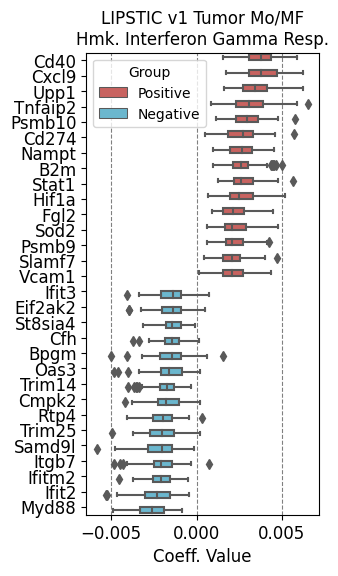

In [540]:
top_coeff_plot(df, 15, 'LIPSTIC v1 Tumor Mo/MF\nHmk. Interferon Gamma Resp.')

In [456]:
df = kegg_dict.response['annotation_fine']['Mo/MF'].filter(like='Cell adhesion molecules')

In [457]:
df.columns = [myname.split('_', 1)[0] for myname in df.columns]

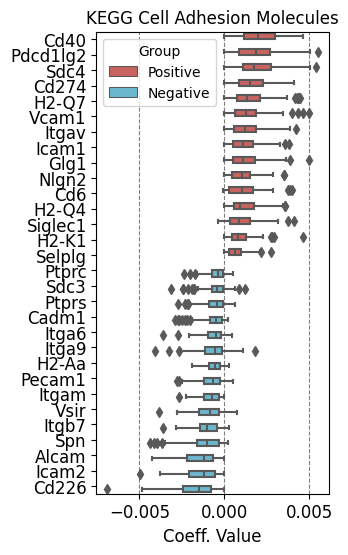

In [458]:
top_coeff_plot(df, 15, 'KEGG Cell Adhesion Molecules')

In [541]:
sorted_dict = kegg_dict.pathway_frequencies['annotation_fine']['cDC2']

In [542]:
sub_sorted_dict = sorted_dict[:25]

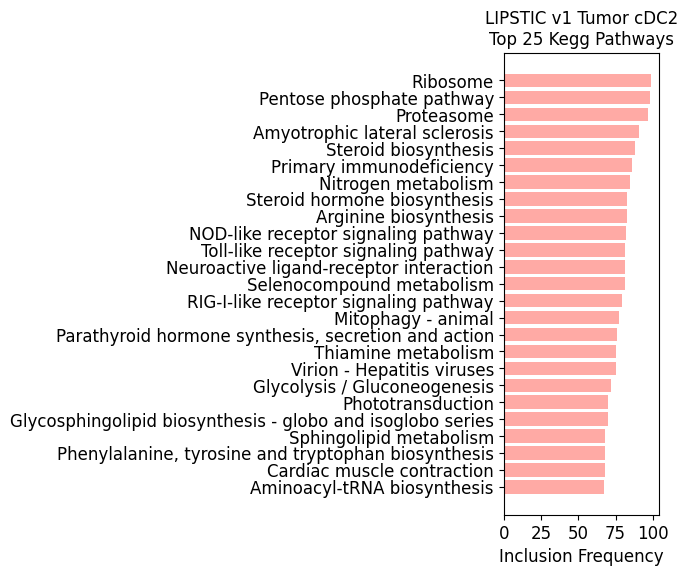

In [543]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('LIPSTIC v1 Tumor cDC2\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

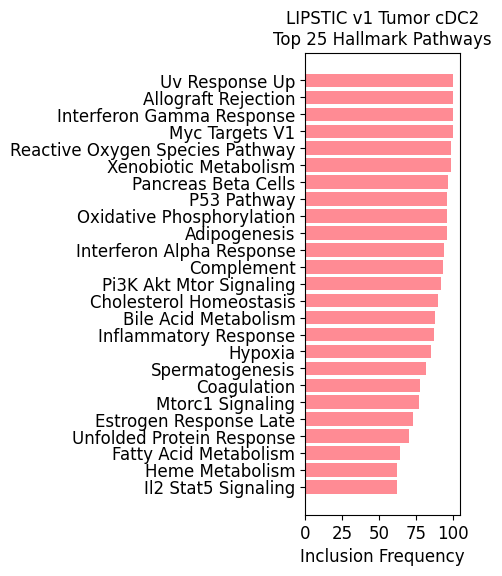

In [475]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['cDC2']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('LIPSTIC v1 Tumor cDC2\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

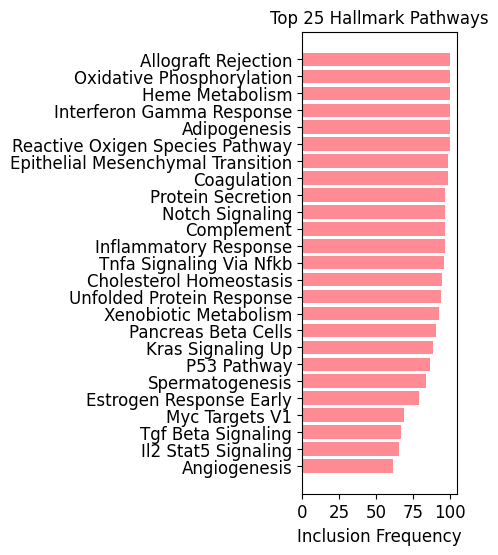

In [106]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['Mo/MF']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('Top 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [450]:
def top_coeff_plot(df, num_coefs, mystr):
    
    # Subset to first 15 and last 15 columns
    first_15_cols = df.iloc[:, :num_coefs]
    last_15_cols = df.iloc[:, -num_coefs:]

    # Melt the DataFrames separately
    first_15_melted = first_15_cols.melt(var_name='Feature', value_name='Coeff. Value')
    last_15_melted = last_15_cols.melt(var_name='Feature', value_name='Coeff. Value')

    # Add a group label
    first_15_melted['Group'] = 'Negative'
    last_15_melted['Group'] = 'Positive'

    # Combine the melted DataFrames
    df_melted = pd.concat([first_15_melted, last_15_melted]).iloc[::-1]

    # Create the boxplot
    plt.figure(figsize=(3, 6))
    plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
    sns.boxplot(x='Coeff. Value', y='Feature', hue='Group', data=df_melted, palette=['#D9534F', '#5BC0DE'])

    # Rotate x labels for better readability
    # plt.xticks(rotation=90)
    
    # Show the plot
    #plt.title('{}'.format(mystr.split('_', 1)[1]))
    plt.title(mystr)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel('Coeff. Value', fontsize=12)
    plt.ylabel('')
    plt.show()

In [469]:
df = hallmark_dict.response_individual_genes['annotation_fine']['cDC2'].drop(columns='log')

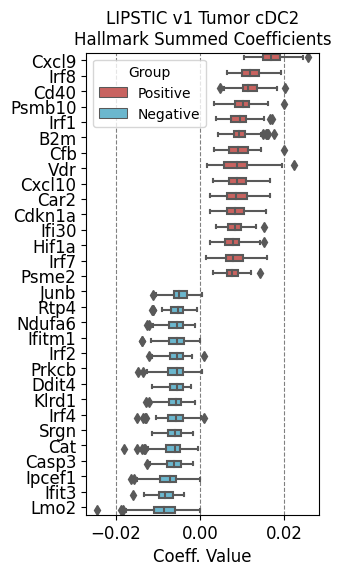

In [476]:
top_coeff_plot(df, 15, 'LIPSTIC v1 Tumor cDC2\nHallmark Summed Coefficients')

In [544]:
sorted_dict = kegg_dict.pathway_frequencies['annotation_fine']['mRegDC2']

In [545]:
sub_sorted_dict = sorted_dict[:25]

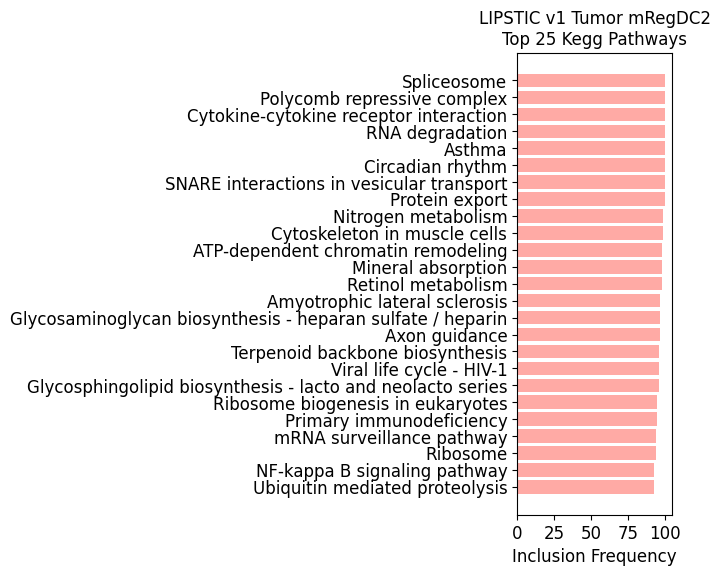

In [547]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('LIPSTIC v1 Tumor mRegDC2\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

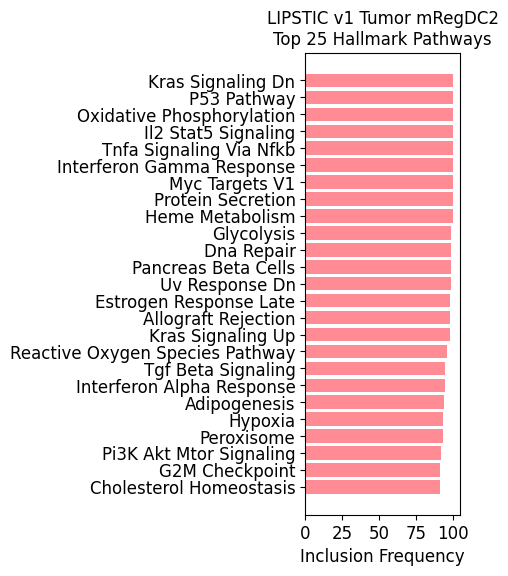

In [481]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['mRegDC2']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('LIPSTIC v1 Tumor mRegDC2\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

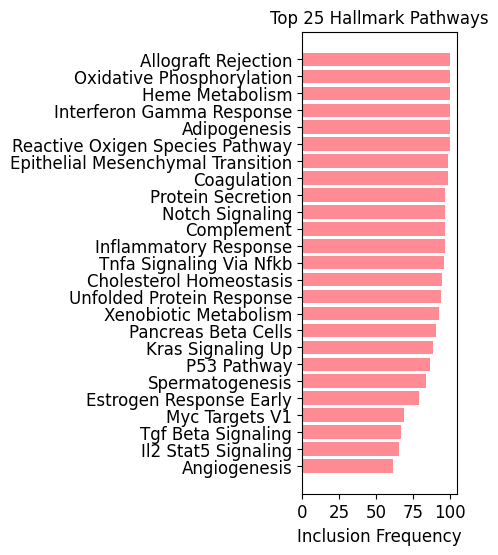

In [106]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['Mo/MF']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('Top 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [482]:
def top_coeff_plot(df, num_coefs, mystr):
    
    # Subset to first 15 and last 15 columns
    first_15_cols = df.iloc[:, :num_coefs]
    last_15_cols = df.iloc[:, -num_coefs:]

    # Melt the DataFrames separately
    first_15_melted = first_15_cols.melt(var_name='Feature', value_name='Coeff. Value')
    last_15_melted = last_15_cols.melt(var_name='Feature', value_name='Coeff. Value')

    # Add a group label
    first_15_melted['Group'] = 'Negative'
    last_15_melted['Group'] = 'Positive'

    # Combine the melted DataFrames
    df_melted = pd.concat([first_15_melted, last_15_melted]).iloc[::-1]

    # Create the boxplot
    plt.figure(figsize=(3, 6))
    plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
    sns.boxplot(x='Coeff. Value', y='Feature', hue='Group', data=df_melted, palette=['#D9534F', '#5BC0DE'])

    # Rotate x labels for better readability
    # plt.xticks(rotation=90)
    
    # Show the plot
    #plt.title('{}'.format(mystr.split('_', 1)[1]))
    plt.title(mystr)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel('Coeff. Value', fontsize=12)
    plt.ylabel('')
    plt.show()

In [483]:
df = hallmark_dict.response_individual_genes['annotation_fine']['mRegDC2'].drop(columns='log')

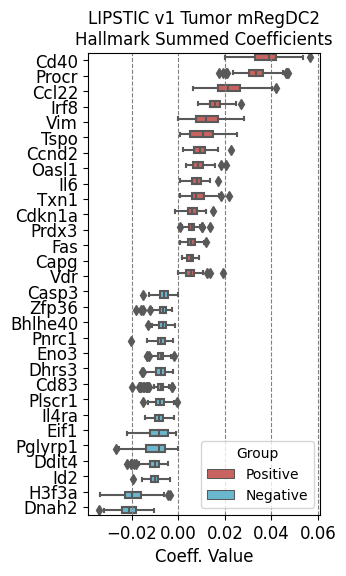

In [484]:
top_coeff_plot(df, 15, 'LIPSTIC v1 Tumor mRegDC2\nHallmark Summed Coefficients')

In [548]:
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_ln_new_gloss_bootstrap_kegg_oct26_2024.pickle', 'rb') as handle:
    kegg_dict = pickle.load(handle)

In [549]:
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_ln_new_gloss_bootstrap_hallmark_oct26_2024.pickle', 'rb') as handle:
    hallmark_dict = pickle.load(handle)

In [550]:
sorted_dict = kegg_dict.pathway_frequencies['annot']['Cd4']

In [551]:
sub_sorted_dict = sorted_dict[:25]

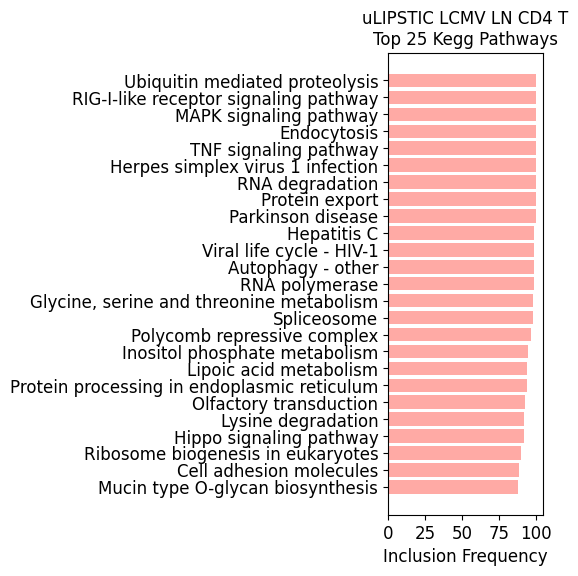

In [552]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('uLIPSTIC LCMV LN CD4 T\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

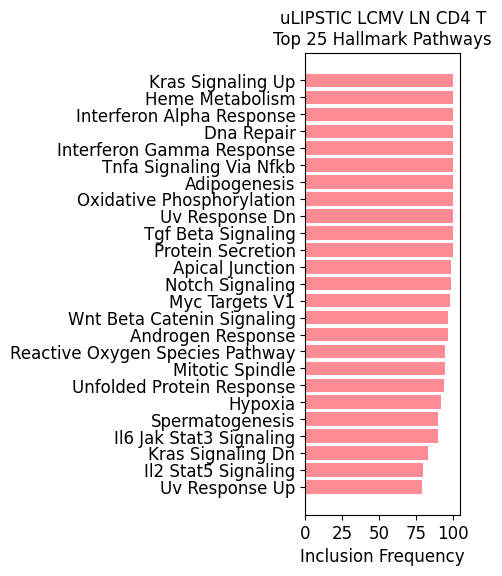

In [508]:
sorted_dict = hallmark_dict.pathway_frequencies['annot']['Cd4']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('uLIPSTIC LCMV LN CD4 T\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [509]:
df = hallmark_dict.response_individual_genes['annot']['Cd4'].drop(columns='log')

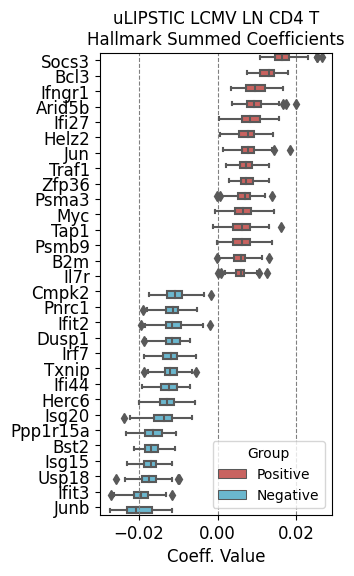

In [510]:
top_coeff_plot(df, 15, 'uLIPSTIC LCMV LN CD4 T\nHallmark Summed Coefficients')

In [553]:
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_sys_new_gloss_bootstrap_kegg_oct26_2024.pickle', 'rb') as handle:
    kegg_dict = pickle.load(handle)

In [554]:
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_sys_new_gloss_bootstrap_hallmark_oct26_2024.pickle', 'rb') as handle:
    hallmark_dict = pickle.load(handle)

In [555]:
sorted_dict = kegg_dict.pathway_frequencies['annot v2']['macrophage']

In [556]:
sub_sorted_dict = sorted_dict[:25]

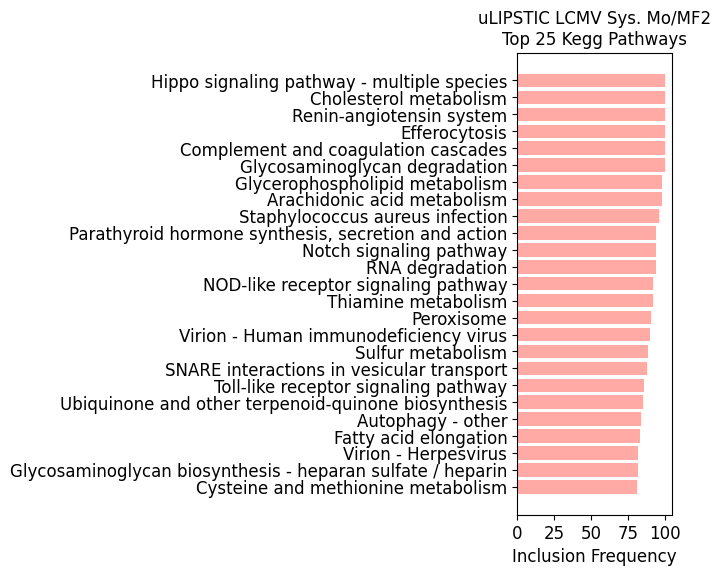

In [557]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('uLIPSTIC LCMV Sys. Mo/MF2\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

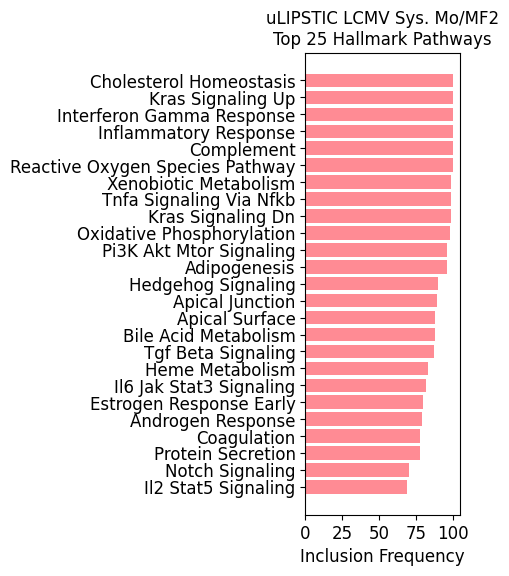

In [517]:
sorted_dict = hallmark_dict.pathway_frequencies['annot v2']['macrophage']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('uLIPSTIC LCMV Sys. Mo/MF2\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [518]:
df = hallmark_dict.response_individual_genes['annot v2']['macrophage'].drop(columns='log')

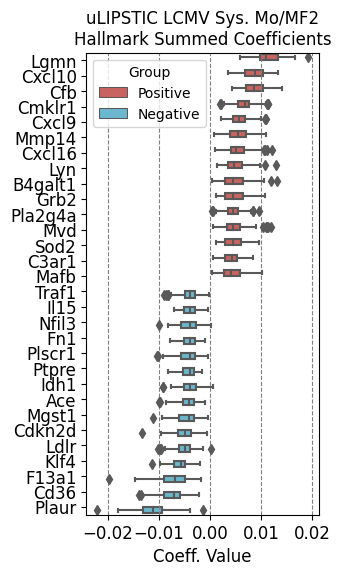

In [519]:
top_coeff_plot(df, 15, 'uLIPSTIC LCMV Sys. Mo/MF2\nHallmark Summed Coefficients')

In [558]:
with open('../model_ulipstic_gut/experiment_evaluations/gut_new_gloss_bootstrap_kegg_oct24_2024.pickle', 'rb') as handle:
    kegg_dict = pickle.load(handle)

In [559]:
with open('../model_ulipstic_gut/experiment_evaluations/gut_new_gloss_bootstrap_hallmark_oct24_2024.pickle', 'rb') as handle:
    hallmark_dict = pickle.load(handle)

In [560]:
sorted_dict = kegg_dict.pathway_frequencies['annotation']['CD4']

In [561]:
sub_sorted_dict = sorted_dict[:25]

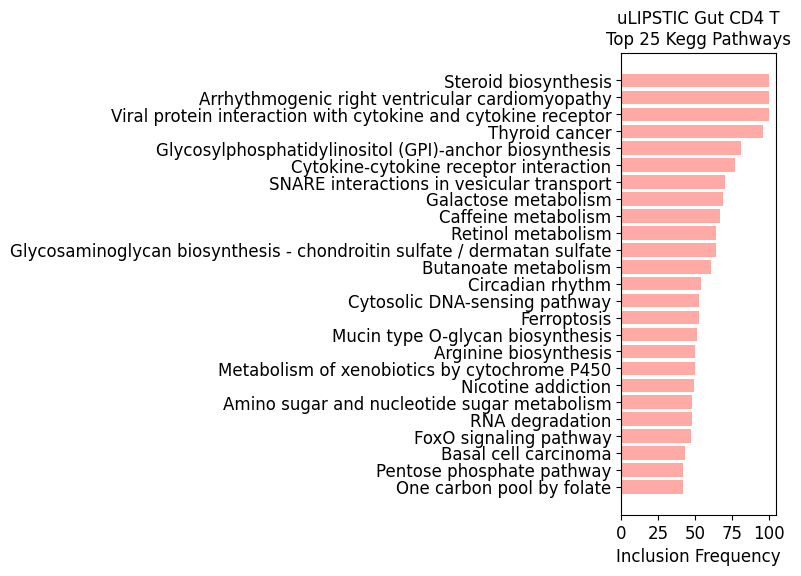

In [562]:
names, frequencies = zip(*sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Kegg'])
plt.title('uLIPSTIC Gut CD4 T\nTop 25 Kegg Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

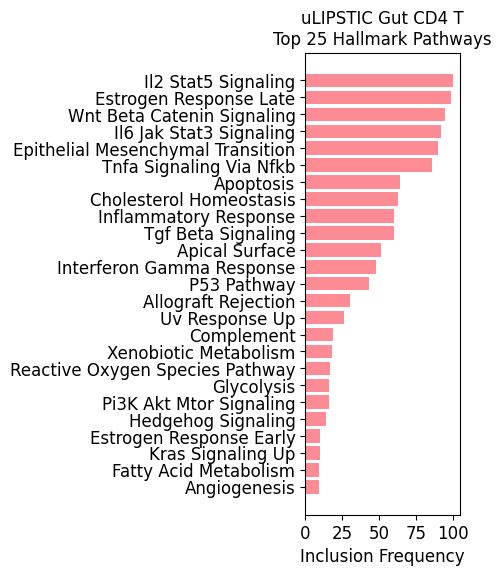

In [527]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation']['CD4']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

newnames = []
for name in names:
    if name == 'Reactive Oxigen Species Pathway':
        newnames.append('Reactive Oxygen Species Pathway')
    else:
        newnames.append(name)
names = tuple(newnames)

# Create the bar plot
plt.figure(figsize=(2, 6))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['Gloss Hmk.'])
plt.title('uLIPSTIC Gut CD4 T\nTop 25 Hallmark Pathways')
plt.xlabel('Inclusion Frequency', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [528]:
df = hallmark_dict.response_individual_genes['annotation']['CD4'].drop(columns='log')

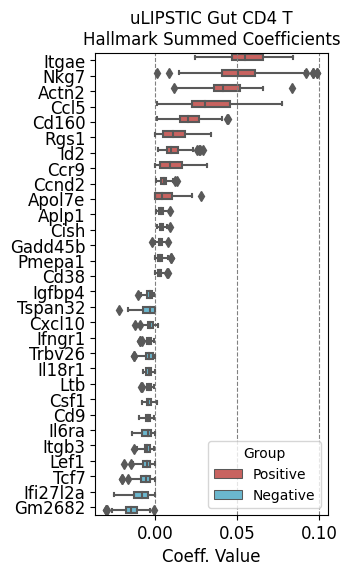

In [529]:
top_coeff_plot(df, 15, 'uLIPSTIC Gut CD4 T\nHallmark Summed Coefficients')